In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg

In [ ]:
path='/content/drive/My Drive/Brain_Tumor/'

In [ ]:
categories = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

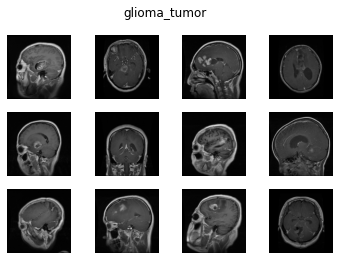

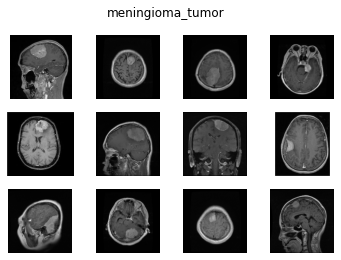

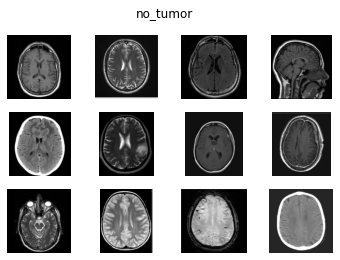

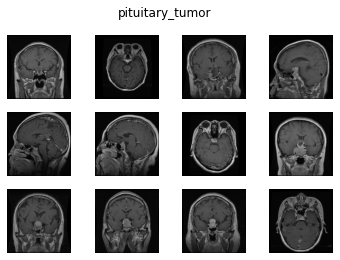

In [ ]:
# let's display some of the pictures
for category in categories:
  fig, _=plt.subplots(3,4)
  fig.suptitle(category)
  for k, v in enumerate(os.listdir(path+category) [:12]):
    img=plt.imread(path+category+'/'+v)
    plt.subplot(3,4,k+1)
    plt.axis("off")
    plt.imshow(img)
  plt.show()

In [ ]:
#for check image height and width
shape0=[]
shape1=[]

for category in categories:
  for files in os.listdir(path+category):
      shape0.append(plt.imread(path+category+'/'+ files).shape[0])
      shape1.append(plt.imread(path+category+'/'+files).shape[1])
  print(category,'=>Height:',min(shape0),'=>Width:',min(shape1))
  print(category,'=>Height:',max(shape0),'=>Width:',max(shape1))        

glioma_tumor =>Height: 512 =>Width: 512
glioma_tumor =>Height: 512 =>Width: 512
meningioma_tumor =>Height: 207 =>Width: 180
meningioma_tumor =>Height: 1427 =>Width: 1275
no_tumor =>Height: 198 =>Width: 180
no_tumor =>Height: 1446 =>Width: 1375
pituitary_tumor =>Height: 198 =>Width: 180
pituitary_tumor =>Height: 1446 =>Width: 1375


In [ ]:
for k, category in enumerate(categories):
  print(k)
  print(category)

0
glioma_tumor
1
meningioma_tumor
2
no_tumor
3
pituitary_tumor


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Preprocess data and label inputs
# initialize the data and labels
data=[]
label=[]
imagePaths=[]
HEIGHT=150
WIDTH=150
N_CHANNEL=3

for k, category in enumerate(categories):
  for f in os.listdir(path+category):
    imagePaths.append([path+category+'/'+f,k])# k=0 : 'Normal', k=1 : 'Abnormal'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

label=[]
labels=[]
for imagePath in imagePaths:
  image = cv2.imread(imagePath[0])
  image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
  data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
  label = imagePath[1]
  labels.append(label)
print(labels)#labels are target varible

[['/content/drive/My Drive/Brain_Tumor/meningioma_tumor/m2 (70).jpg', 1], ['/content/drive/My Drive/Brain_Tumor/no_tumor/image(32).jpg', 2], ['/content/drive/My Drive/Brain_Tumor/meningioma_tumor/m3 (221).jpg', 1], ['/content/drive/My Drive/Brain_Tumor/pituitary_tumor/p (496).jpg', 3], ['/content/drive/My Drive/Brain_Tumor/pituitary_tumor/p (522).jpg', 3], ['/content/drive/My Drive/Brain_Tumor/pituitary_tumor/p (557).jpg', 3], ['/content/drive/My Drive/Brain_Tumor/glioma_tumor/gg (133).jpg', 0], ['/content/drive/My Drive/Brain_Tumor/meningioma_tumor/m (157).jpg', 1], ['/content/drive/My Drive/Brain_Tumor/meningioma_tumor/m (201).jpg', 1], ['/content/drive/My Drive/Brain_Tumor/no_tumor/image(319).jpg', 2]]
[1, 2, 1, 3, 3, 3, 0, 1, 1, 2, 3, 3, 1, 3, 3, 2, 1, 3, 1, 0, 3, 3, 0, 0, 1, 0, 3, 1, 3, 2, 3, 1, 3, 0, 0, 3, 1, 0, 1, 0, 0, 1, 3, 1, 0, 3, 1, 2, 2, 0, 0, 3, 2, 3, 0, 2, 3, 3, 3, 0, 2, 0, 1, 1, 0, 2, 3, 0, 0, 1, 1, 0, 1, 0, 0, 2, 3, 1, 0, 2, 0, 0, 3, 3, 3, 0, 1, 1, 3, 0, 0, 1, 3, 1, 3,

In [ ]:
# scale the raw pixel intensities to the range [0, 1]
import numpy as np

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print(labels)

[1 2 1 ... 2 2 2]


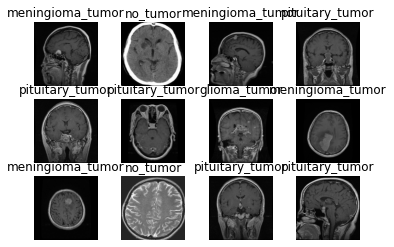

In [ ]:
plt.subplots(3,4)
for i in range(12):
  
  plt.subplot(3,4,i+1)
  plt.imshow(data[i])
  plt.axis("off")
  plt.title(categories[labels[i]])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
(trainX,testX,trainY,testY)=train_test_split(data,labels,test_size=0.4,random_state=42)

In [ ]:
from keras.utils import np_utils
trainY = np_utils.to_categorical(trainY, 4)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(1728, 150, 150, 3)
(1152, 150, 150, 3)
(1728, 4)
(1152,)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout


In [ ]:

model = Sequential()

model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu',input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size= 4,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 71, 71, 32)        16416     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 33, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 16384)           

In [ ]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
54/54 [==============================] - 1s 20ms/step - loss: 1.1095 - accuracy: 0.5197
Epoch 2/25
54/54 [==============================] - 1s 18ms/step - loss: 0.7273 - accuracy: 0.6881
Epoch 3/25
54/54 [==============================] - 1s 18ms/step - loss: 0.5025 - accuracy: 0.8050
Epoch 4/25
54/54 [==============================] - 1s 19ms/step - loss: 0.4190 - accuracy: 0.8345
Epoch 5/25
54/54 [==============================] - 1s 18ms/step - loss: 0.2704 - accuracy: 0.9039
Epoch 6/25
54/54 [==============================] - 1s 18ms/step - loss: 0.2057 - accuracy: 0.9282
Epoch 7/25
54/54 [==============================] - 1s 19ms/step - loss: 0.1269 - accuracy: 0.9601
Epoch 8/25
54/54 [==============================] - 1s 19ms/step - loss: 0.0615 - accuracy: 0.9792
Epoch 9/25
54/54 [==============================] - 1s 19ms/step - loss: 0.0871 - accuracy: 0.9722
Epoch 10/25
54/54 [==============================] - 1s 19ms/step - loss: 0.0430 - accuracy: 0.9873
Epoch 11/

In [ ]:
from numpy import argmax
from sklearn.metrics import confusion_matrix,accuracy_score
pred=model.predict(testX)
predictions = argmax(pred, axis=1) 
cm = confusion_matrix(testY, predictions)
cm

array([[325,  33,   0,   3],
       [ 24, 253,  28,  15],
       [  2,  11, 142,   4],
       [  0,   7,   3, 302]])

In [ ]:
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

Accuracy : 88.72%


In [ ]:
test_data=[]
test_image_o=cv2.imread('/content/drive/My Drive/Brain_Tumor/glioma_tumor/gg (101).jpg')
test_image=cv2.resize(test_image_o,(WIDTH,HEIGHT))# .flatten()
test_data.append(test_image)

# scale the raw pixel intensities to the range [0, 1]
test_data=np.array(test_image,dtype="float")/255.0
test_data=test_data.reshape([-1,150, 150, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) # return to label
print ('Prediction : '+categories[predictions[0]])

Prediction : glioma_tumor
